In [1]:
from pricer import *
from policy import DispatchSimulator
import seaborn as sns
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Accumulated Deal VaR

## 240

In [105]:
rep = 1000

In [106]:
# Using default PathGenerator
sim = DispatchSimulator()
result, _, power, _, gas, _, _, _, count  = sim.dispatch(rep)

In [107]:
discount = np.array([exp(-(sim.r(i/240) + sim.OAS_l) * i/240) for i in range(240)])
fix_payment = np.mean(gas) / np.sum(discount)

### JCAdvisors

In [108]:
price_daily_240 = 300000
total_paid = price_daily_240 * discount.sum()

In [109]:
total_paid

70149891.29843901

In [115]:
profit = np.array([-x - total_paid for x in gas])
VaR_us_240 = np.percentile(profit, 5)

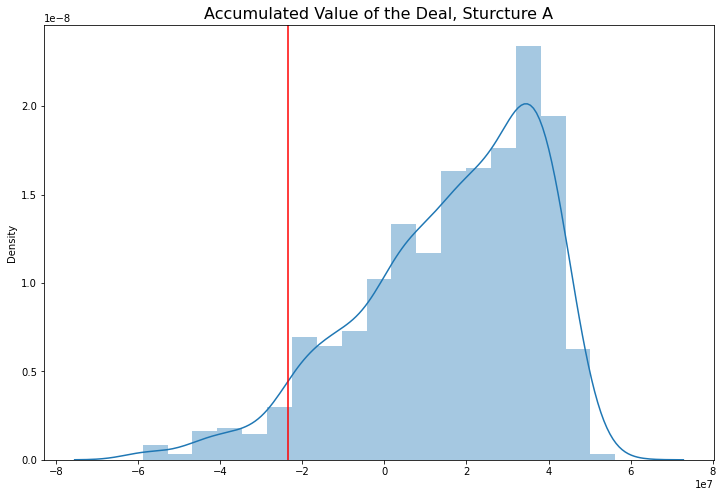

In [111]:
plt.figure(figsize = (12,8))
plt.title("Accumulated Value of the Deal, Sturcture A", size=16)
sns.distplot(profit)
plt.axvline(VaR_us_240, color='red')
plt.show()

In [112]:
print("The Accumulated 5% Value at Risk for the deal is: \n", VaR_us_240)

The Accumulated 5% Value at Risk for the deal is: 
 -23543711.981259376


In [113]:
np.mean(profit), np.std(receivable)/np.sqrt(rep)

(16214729.987043697, 223038.32856250223)

### Fillmore

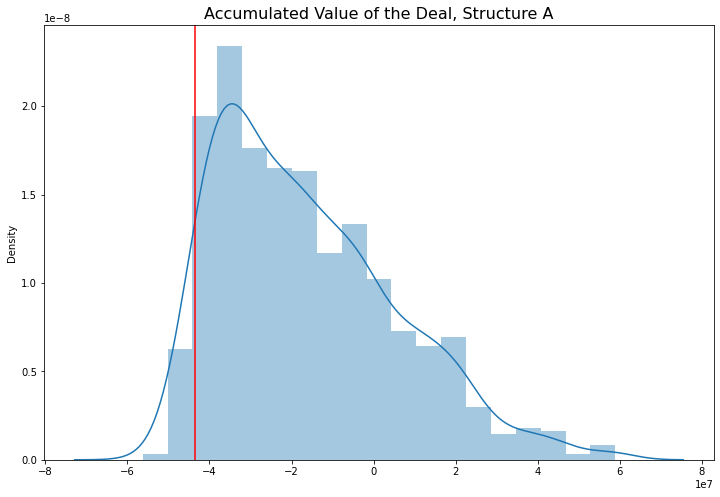

In [117]:
VaR_fillmore_240 = np.percentile(-profit, 5)
plt.figure(figsize = (12,8))
plt.title("Accumulated Value of the Deal, Structure A", size=16)
sns.distplot(-profit)
plt.axvline(VaR_fillmore_240, color='red')
plt.show()

In [26]:
print("The Accumulated 5% Value at Risk for the deal is: \n", VaR)

The Accumulated 5% Value at Risk for the deal is: 
 -112922722.03408015


In [118]:
np.mean(-profit), np.std(-profit)/np.sqrt(rep)

(-16214729.987043697, 695274.754891723)

## 120

### JCAdvisors

In [119]:
sim = DispatchSimulator(days=120)
result, _, power, _, gas, _, _, _, count  = sim.dispatch(rep)

In [120]:
price_daily_120 = 280000

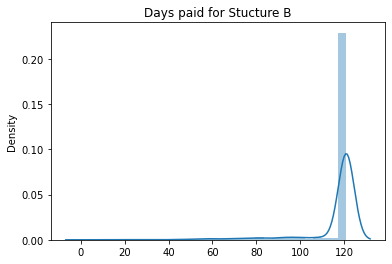

In [121]:
sns.distplot(count)
plt.title('Days paid for Stucture B')
plt.show()

In [122]:
total_paid = price_daily_120 * np.array([np.sum(discount[:cnt]) for cnt in count])

In [123]:
# Always count the full 120 days
# total_paid = price_daily_120 * discount[:120].sum()

In [124]:
receivable = -np.array(gas)
profit = receivable - total_paid

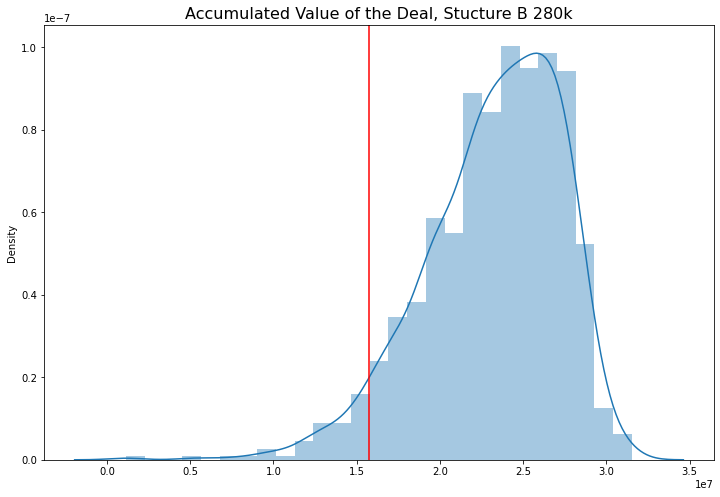

In [125]:
VaR_120 = np.percentile(profit, 5)
plt.figure(figsize = (12,8))
plt.title("Accumulated Value of the Deal, Stucture B 280k", size=16)
sns.distplot(profit)
plt.axvline(VaR_120, color='red')
plt.show()

In [126]:
print("The Accumulated 5% Value at Risk for the deal is: \n", VaR_120)

The Accumulated 5% Value at Risk for the deal is: 
 15765449.278116629


In [127]:
np.mean(profit), np.std(profit)/np.sqrt(rep)

(23200045.521061238, 129614.56397769318)

### Fillmore

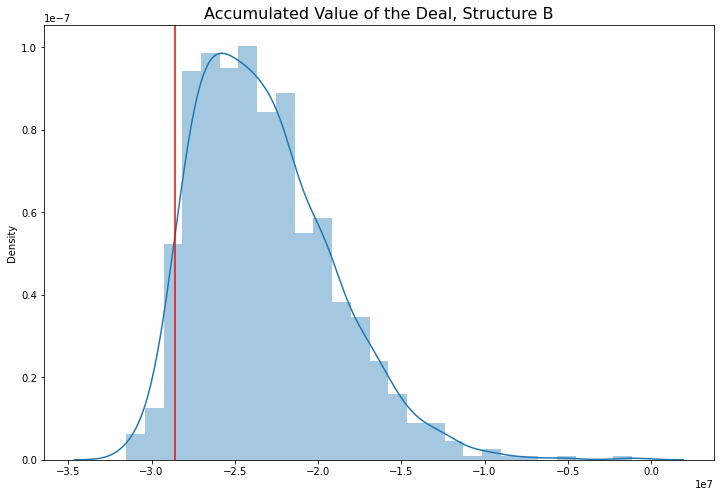

In [128]:
VaR_fillmore_120 = np.percentile(-profit, 5)
plt.figure(figsize = (12,8))
plt.title("Accumulated Value of the Deal, Structure B", size=16)
sns.distplot(-profit)
plt.axvline(VaR_fillmore_120, color='red')
plt.show()

In [129]:
print("The Accumulated 5% Value at Risk for the deal is: \n", VaR_fillmore_120)

The Accumulated 5% Value at Risk for the deal is: 
 -28580713.455933936


In [130]:
np.mean(-profit), np.std(-profit)/np.sqrt(rep)

(-23200045.521061238, 129614.56397769318)

# VaR for Each Holding Period
There is no point in nested simulation for the purpose of our product, since it's cumulative

--------------------------------------------------------------------------------
Current length 1 month(s)


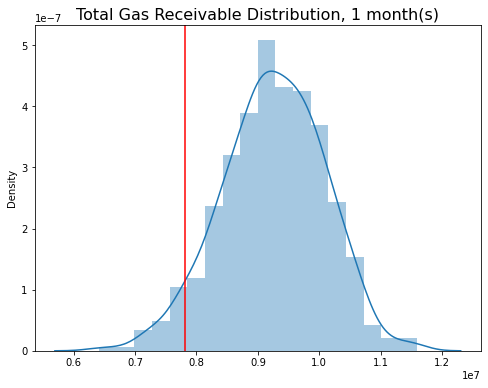

The Accumulated 5% Value at Risk for us is: 
 7812139.715958488


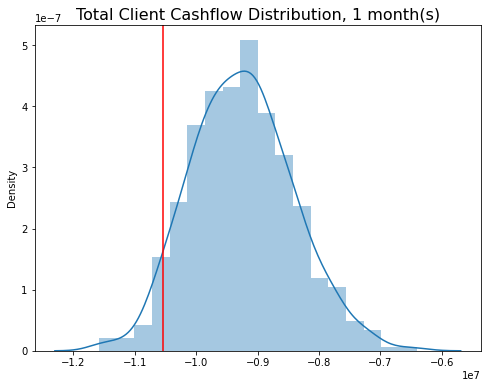

The Accumulated 5% Value at Risk for the client is: 
 -10541857.63952389
--------------------------------------------------------------------------------
Current length 2 month(s)


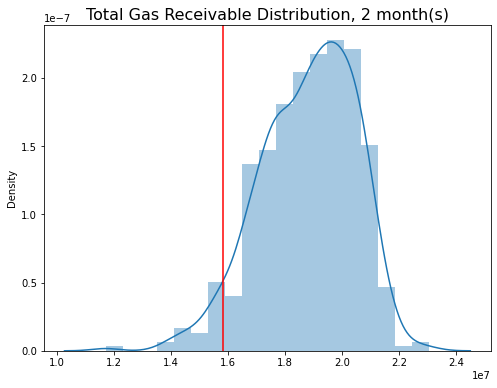

The Accumulated 5% Value at Risk for us is: 
 15831457.078118535


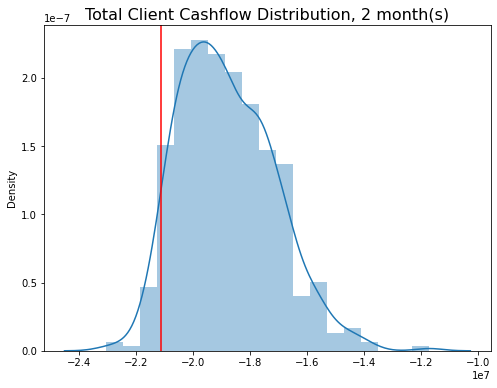

The Accumulated 5% Value at Risk for the client is: 
 -21105344.161184162
--------------------------------------------------------------------------------
Current length 3 month(s)


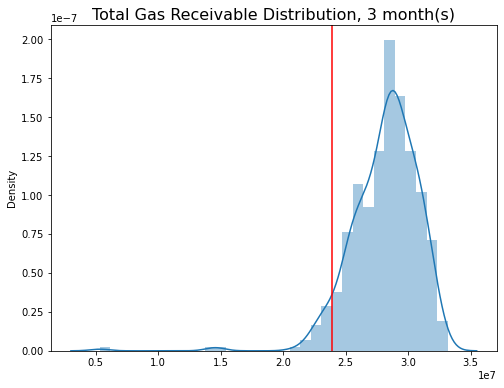

The Accumulated 5% Value at Risk for us is: 
 23880499.3097131


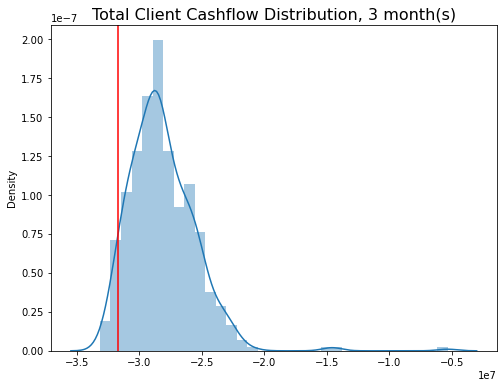

The Accumulated 5% Value at Risk for the client is: 
 -31702179.117145255
--------------------------------------------------------------------------------
Current length 4 month(s)


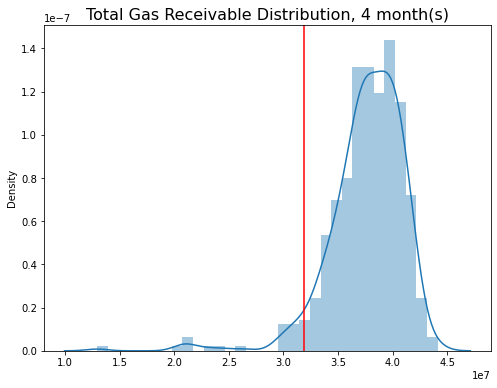

The Accumulated 5% Value at Risk for us is: 
 31909632.240777586


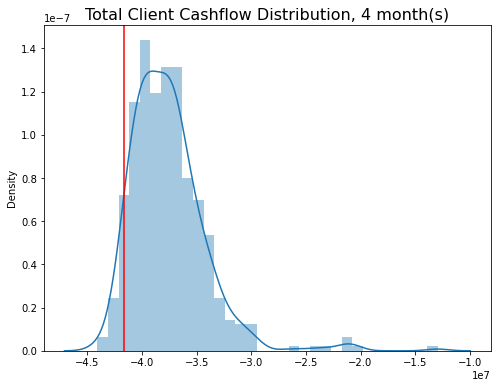

The Accumulated 5% Value at Risk for the client is: 
 -41669783.165583685
--------------------------------------------------------------------------------
Current length 5 month(s)


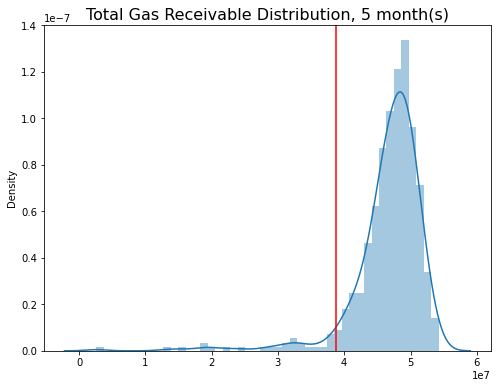

The Accumulated 5% Value at Risk for us is: 
 38753791.66638082


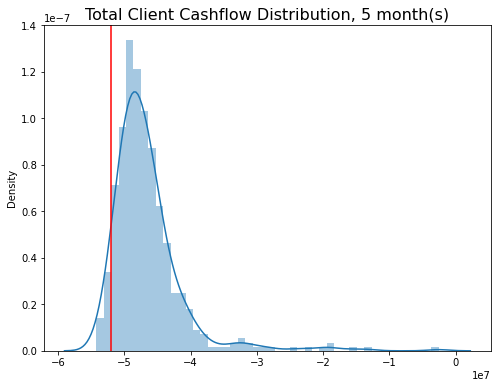

The Accumulated 5% Value at Risk for the client is: 
 -52000579.9026561
--------------------------------------------------------------------------------
Current length 6 month(s)


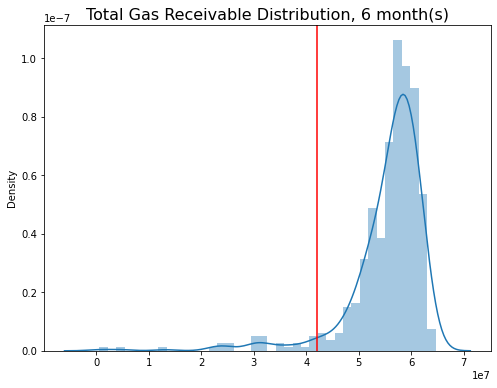

The Accumulated 5% Value at Risk for us is: 
 42051589.34177337


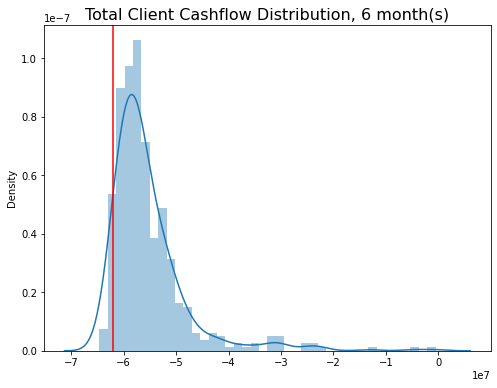

The Accumulated 5% Value at Risk for the client is: 
 -61985526.97162471
--------------------------------------------------------------------------------
Current length 7 month(s)


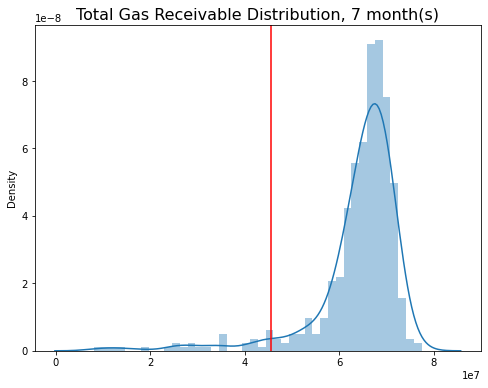

The Accumulated 5% Value at Risk for us is: 
 45571531.613024436


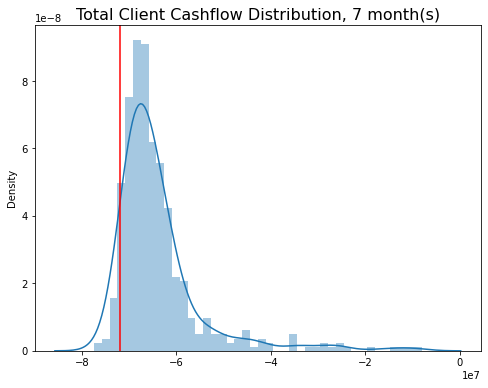

The Accumulated 5% Value at Risk for the client is: 
 -71917659.64957082
--------------------------------------------------------------------------------
Current length 8 month(s)


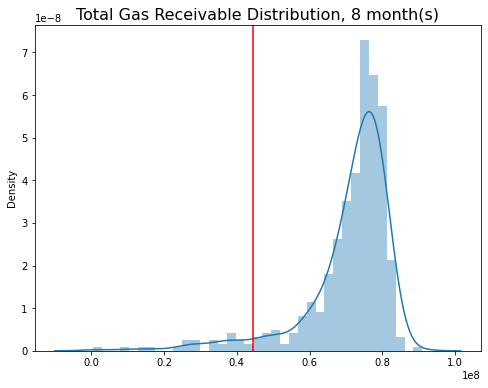

The Accumulated 5% Value at Risk for us is: 
 44449890.9385961


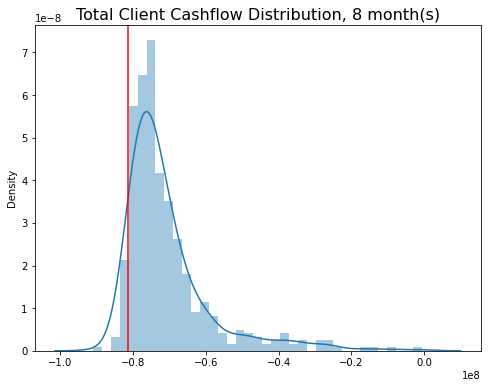

The Accumulated 5% Value at Risk for the client is: 
 -81495070.00539425
--------------------------------------------------------------------------------
Current length 9 month(s)


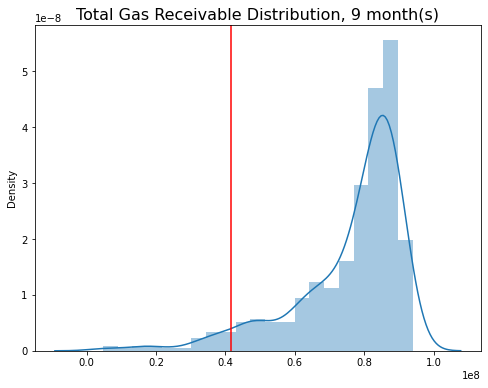

The Accumulated 5% Value at Risk for us is: 
 41693304.88915921


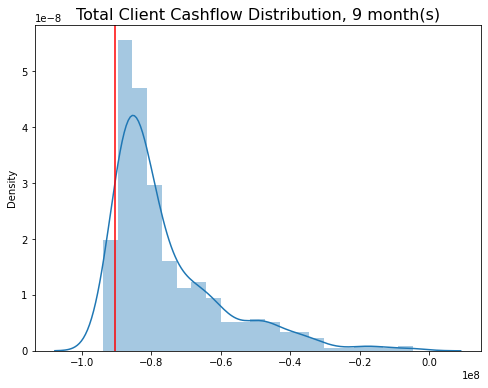

The Accumulated 5% Value at Risk for the client is: 
 -90412783.61679782
--------------------------------------------------------------------------------
Current length 10 month(s)


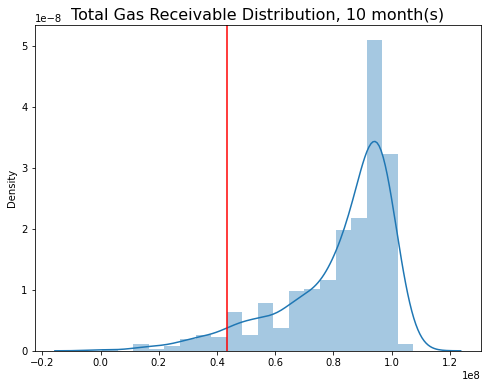

The Accumulated 5% Value at Risk for us is: 
 43284994.7583722


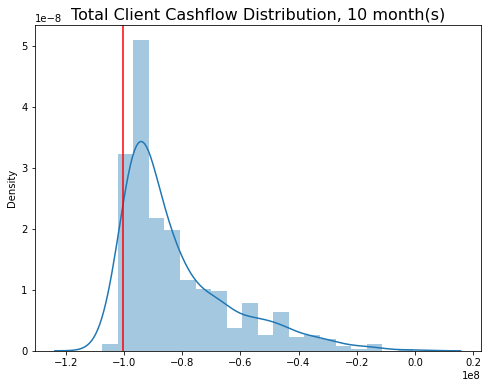

The Accumulated 5% Value at Risk for the client is: 
 -100251993.39477918
--------------------------------------------------------------------------------
Current length 11 month(s)


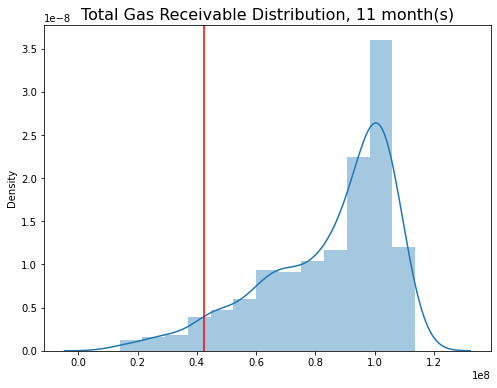

The Accumulated 5% Value at Risk for us is: 
 42272159.47913572


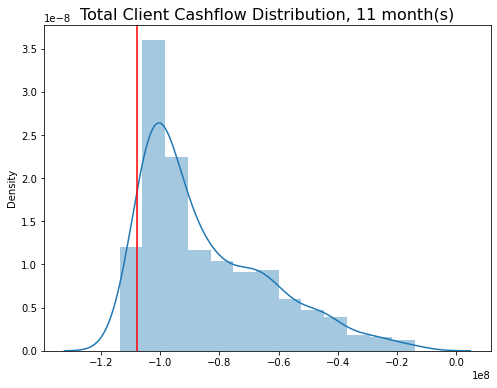

The Accumulated 5% Value at Risk for the client is: 
 -107832435.68928935


In [29]:
rep2 = 500
for i in range(1, 12):
    print("-"*80)
    print("Current length {} month(s)".format(i))
    sim = DispatchSimulator(days=i*20)
    result, _, power, _, gas, _, _, _  = sim.dispatch(rep2)
    receivable = [-x for x in gas]
    VaR_us = np.percentile(receivable, 5)
    VaR_client = np.percentile(gas, 5)

    plt.figure(figsize = (8,6))
    plt.title("Total Gas Receivable Distribution, {} month(s)".format(i), size=16)
    sns.distplot(receivable)
    plt.axvline(VaR_us, color='red')
    plt.show()
    print("The Accumulated 5% Value at Risk for us is: \n", VaR_us)
    
    plt.figure(figsize = (8,6))
    plt.title("Total Client Cashflow Distribution, {} month(s)".format(i), size=16)
    sns.distplot(gas)
    plt.axvline(VaR_client, color='red')
    plt.show()
    print("The Accumulated 5% Value at Risk for the client is: \n", VaR_client)

# Greeks

## Parameter Initialization

In [22]:
n=500 # paths
greek_iterations=50 # iterations for greeks

In [23]:
month_start = np.arange(0, 261)[::20]
mu0 = np.array([95.76548345, 89.52283873, 95.35215501, 104.46874005, 94.6203973,
                80.91702108, 100.07035029, 93.69413937, 100.4471256, 100.71685473,
                99.78141199, 96.19445081, 79.62785258, 76.88922716, 9.45413411,
                9.93164887, 10.68021599, 10.53612154, 10.75736881, 11.92659786,
                10.16327577, 12.79479404, 9.80340575, 13.90669016, 9.79955108,
                13.78518266, 6.879269, 6.98612125])
theta_e_grid = mu0[:14]
theta_g_grid = mu0[14:]
theta_e = interp1d(month_start, theta_e_grid, kind='linear')
theta_g = interp1d(month_start, theta_g_grid, kind='linear')
vol_g_fourier = VolGFourier()

## Note

### All Greeks are from the point of the CLIENT
All gas here are negative, thus representing value for client.

# Energy Delta (Client)

### 240

In [3]:
h = 1
e_low = 82 - h
e_high = 82 + h

In [4]:
delta_list = []
for i in tqdm(range(greek_iterations)):
    gas_receivable_list = []
    for e_start in (e_low, e_high):
        path = PathGenerator(e0=e_start)
        sim = DispatchSimulator(path=path)
        values = sim.value(n)
        gas = values[4]
        gas_receivable_list.append(gas)
    delta = (gas_receivable_list[1] - gas_receivable_list[0]) / (2 * h)
    delta_list.append(delta)

100%|██████████| 10/10 [04:42<00:00, 28.26s/it]


In [5]:
np.mean(delta_list), np.std(delta_list)/np.sqrt(greek_iterations)

(-790374.739075978, 310499.8090315963)

### 120

In [7]:
h = 1
e_low = 82 - h
e_high = 82 + h

In [8]:
delta_list = []
for i in tqdm(range(greek_iterations)):
    gas_receivable_list = []
    for e_start in (e_low, e_high):
        path = PathGenerator(e0=e_start)
        sim = DispatchSimulator(days=120, path=path)
        values = sim.value(n)
        gas = values[4]
        gas_receivable_list.append(gas)
    delta = (gas_receivable_list[1] - gas_receivable_list[0]) / (2 * h)
    delta_list.append(delta)

100%|██████████| 10/10 [03:19<00:00, 20.00s/it]


In [9]:
np.mean(delta_list), np.std(delta_list)/np.sqrt(greek_iterations)

(-86919.38266240321, 124072.76534408568)

# Gas Delta (Client)

### 240

In [14]:
h = 0.1
g_low = 9.52 - h
g_high = 9.52 + h

In [15]:
delta_list = []
for i in tqdm(range(greek_iterations)):
    gas_list = []
    for g_start in (g_low, g_high):
        path = PathGenerator(g0=g_start)
        sim = DispatchSimulator(path=path)
        values = sim.value(n)
        gas = values[4]
        gas_list.append(gas)
    delta = (gas_list[1] - gas_list[0]) / (2 * h)
    delta_list.append(delta)

100%|██████████| 10/10 [04:59<00:00, 29.95s/it]


In [16]:
np.mean(delta_list), np.std(delta_list)/np.sqrt(greek_iterations)

(4957604.006518036, 4610330.80231764)

### 120

In [10]:
h = 0.1
g_low = 9.52 - h
g_high = 9.52 + h

In [11]:
delta_list = []
for i in tqdm(range(greek_iterations)):
    gas_list = []
    for g_start in (g_low, g_high):
        path = PathGenerator(g0=g_start)
        sim = DispatchSimulator(days=120, path=path)
        values = sim.value(n)
        gas = values[4]
        gas_list.append(gas)
    delta = (gas_list[1] - gas_list[0]) / (2 * h)
    delta_list.append(delta)

100%|██████████| 10/10 [03:19<00:00, 19.93s/it]


In [12]:
np.mean(delta_list), np.std(delta_list)/np.sqrt(greek_iterations)

(-723530.1584748663, 735443.1708968882)

# Gas Vega

### 240

In [15]:
h = 0.1
vol_g_fourier_low = VolGFourier(hypothetical_parallel_shift=-h)
vol_g_fourier_high = VolGFourier(hypothetical_parallel_shift=h)

In [16]:
vega_list = []
for i in tqdm(range(greek_iterations)):
    gas_list = []
    for vol in (vol_g_fourier_low, vol_g_fourier_high):
        path = PathGenerator(model_params=[np.array([theta_e, theta_g]), (None, vol), 20, True])
        sim = DispatchSimulator(path=path)
        values = sim.value(n)
        gas = values[4]
        gas_list.append(gas)
    vega = (gas_list[1] - gas_list[0]) / (2 * h)
    vega_list.append(vega)

100%|██████████| 30/30 [15:22<00:00, 30.76s/it]


In [12]:
np.mean(vega_list), np.std(vega_list)/np.sqrt(greek_iterations)

(30245595.762952935, 25337749.17361912)

### 120

In [24]:
h = 0.01
vol_g_fourier_low = VolGFourier(hypothetical_parallel_shift=-h)
vol_g_fourier_high = VolGFourier(hypothetical_parallel_shift=h)

In [25]:
vega_list = []
for i in tqdm(range(greek_iterations)):
    gas_list = []
    for vol in (vol_g_fourier_low, vol_g_fourier_high):
        path = PathGenerator(model_params=[np.array([theta_e, theta_g]), (None, vol), 20, True])
        sim = DispatchSimulator(days=120, path=path)
        values = sim.value(n)
        gas = values[4]
        gas_list.append(gas)
    vega = (gas_list[1] - gas_list[0]) / (2 * h)
    vega_list.append(vega)

100%|██████████| 50/50 [40:02<00:00, 48.04s/it]


In [26]:
np.mean(vega_list), np.std(vega_list)/np.sqrt(greek_iterations)

(5681295.137506404, 3441854.4271494607)

# Model Energy Theta Sensitivity

In [17]:
h = 1
theta_e_low = interp1d(month_start, [x-h for x in theta_e_grid], kind='linear')
theta_e_high = interp1d(month_start, [x+h for x in theta_e_grid], kind='linear')

In [18]:
theta_sensitivity_list = []
for i in tqdm(range(greek_iterations)):
    gas_list = []
    for t in (theta_e_low, theta_e_high):
        path = PathGenerator(model_params=[np.array([t, theta_g]), (None, vol_g_fourier), 20, True])
        sim = DispatchSimulator(path=path)
        values = sim.value(n)
        gas = values[4]
        gas_list.append(gas)
    theta_sensitivity = (gas_list[1] - gas_list[0]) / (2 * h)
    theta_sensitivity_list.append(theta_sensitivity)

100%|██████████| 10/10 [05:03<00:00, 30.38s/it]


In [19]:
np.mean(theta_sensitivity_list), np.std(theta_sensitivity_list)/np.sqrt(greek_iterations)

(-4508639.753564288, 272785.5561156736)

# Model Gas Theta Sensitivity

In [35]:
h = 1
theta_g_low = interp1d(month_start, [x-h for x in theta_g_grid], kind='linear')
theta_g_high = interp1d(month_start, [x+h for x in theta_g_grid], kind='linear')

In [36]:
theta_sensitivity_list = []
for i in tqdm(range(greek_iterations)):
    gas_list = []
    for t in (theta_g_low, theta_g_high):
        path = PathGenerator(model_params=[np.array([theta_e, t]), (None, vol_g_fourier), 20, True])
        sim = DispatchSimulator(path=path)
        values = sim.value(n)
        gas = values[4]
        gas_list.append(gas)
    theta_sensitivity = (gas_list[1] - gas_list[0]) / (2 * h)
    theta_sensitivity_list.append(theta_sensitivity)

100%|██████████| 10/10 [04:45<00:00, 28.50s/it]


In [37]:
np.mean(theta_sensitivity_list), np.std(theta_sensitivity_list)/np.sqrt(greek_iterations)

(24663344.803071987, 335723.4349911829)

# Model Combined Theta Sensitivity

### 240

In [8]:
h = 0.1
theta_e_low = interp1d(month_start, [x-h*8 for x in theta_e_grid], kind='linear')
theta_e_high = interp1d(month_start, [x+h*8 for x in theta_e_grid], kind='linear')
theta_g_low = interp1d(month_start, [x-h for x in theta_g_grid], kind='linear')
theta_g_high = interp1d(month_start, [x+h for x in theta_g_grid], kind='linear')

In [9]:
theta_sensitivity_list = []
for i in tqdm(range(greek_iterations)):
    gas_list = []
    for t in ([theta_e_low, theta_g_low], [theta_e_high, theta_g_high]):
        path = PathGenerator(model_params=[np.array(t), (None, vol_g_fourier), 20, True])
        sim = DispatchSimulator(path=path)
        values = sim.value(n)
        gas = values[4]
        gas_list.append(gas)
    theta_sensitivity = (gas_list[1] - gas_list[0]) / (2 * h)
    theta_sensitivity_list.append(theta_sensitivity)

100%|██████████| 10/10 [05:10<00:00, 31.05s/it]


In [10]:
np.mean(theta_sensitivity_list), np.std(theta_sensitivity_list)/np.sqrt(greek_iterations)

(-4989875.351254888, 2482184.1968883444)

### 120

In [16]:
h = 0.1
theta_e_low = interp1d(month_start, [x-h*8 for x in theta_e_grid], kind='linear')
theta_e_high = interp1d(month_start, [x+h*8 for x in theta_e_grid], kind='linear')
theta_g_low = interp1d(month_start, [x-h for x in theta_g_grid], kind='linear')
theta_g_high = interp1d(month_start, [x+h for x in theta_g_grid], kind='linear')

In [17]:
theta_sensitivity_list = []
for i in tqdm(range(greek_iterations)):
    gas_list = []
    for t in ([theta_e_low, theta_g_low], [theta_e_high, theta_g_high]):
        path = PathGenerator(model_params=[np.array(t), (None, vol_g_fourier), 20, True])
        sim = DispatchSimulator(days=120, path=path)
        values = sim.value(n)
        gas = values[4]
        gas_list.append(gas)
    theta_sensitivity = (gas_list[1] - gas_list[0]) / (2 * h)
    theta_sensitivity_list.append(theta_sensitivity)

100%|██████████| 10/10 [03:17<00:00, 19.76s/it]


In [18]:
np.mean(theta_sensitivity_list), np.std(theta_sensitivity_list)/np.sqrt(greek_iterations)

(-4922930.655050188, 1325068.8309794527)

# Scenario Analysis

### Gas price very volatile: double volatility

In [4]:
vol_g_fourier_double = VolGFourier(hypothetical_multiplier=2)
path = PathGenerator(model_params=[np.array([theta_e, theta_g]), (None, vol_g_fourier_double), 20, True])
sim = DispatchSimulator(path=path)
values = sim.value(n)
gas = values[4]
gas_std = values[5]

In [5]:
gas, gas_std

(-62372250.5617269, 1562138.144192926)

In [ ]:
vol_g_fourier_double = VolGFourier(hypothetical_multiplier=2)
path = PathGenerator(model_params=[np.array([theta_e, theta_g]), (None, vol_g_fourier_double), 20, True])
sim = DispatchSimulator(path=path, days=120)
values = sim.value(n)
gas = values[4]
gas_std = values[5]

In [ ]:
gas, gas_std

### Gas price very stable: half volatility

In [6]:
vol_g_fourier_double = VolGFourier(hypothetical_multiplier=0.5)
path = PathGenerator(model_params=[np.array([theta_e, theta_g]), (None, vol_g_fourier_double), 20, True])
sim = DispatchSimulator(path=path)
values = sim.value(n)
gas = values[4]
gas_std = values[5]

In [7]:
gas, gas_std

(-110797021.59776287, 1033089.5102013416)

In [ ]:
vol_g_fourier_double = VolGFourier(hypothetical_multiplier=0.5)
path = PathGenerator(model_params=[np.array([theta_e, theta_g]), (None, vol_g_fourier_double), 20, True])
sim = DispatchSimulator(path=path， days=120)
values = sim.value(n)
gas = values[4]
gas_std = values[5]

In [ ]:
gas, gas_std

### High demand: energy and gas both get 50% surge in all future price

In [10]:
theta_e_surge = interp1d(month_start, [x * 1.5 for x in theta_e_grid], kind='linear')
theta_g_surge = interp1d(month_start, [x * 1.5 for x in theta_g_grid], kind='linear')

In [11]:
vol_g_fourier_double = VolGFourier(hypothetical_multiplier=0.5)
path = PathGenerator(model_params=[np.array([theta_e_surge, theta_g_surge]), (None, vol_g_fourier), 20, True])
sim = DispatchSimulator(path=path)
values = sim.value(n)
gas = values[4]
gas_std = values[5]

In [12]:
gas, gas_std

(-153901587.12665874, 1726358.8727488737)

In [ ]:
vol_g_fourier_double = VolGFourier(hypothetical_multiplier=0.5)
path = PathGenerator(model_params=[np.array([theta_e_surge, theta_g_surge]), (None, vol_g_fourier), 20, True])
sim = DispatchSimulator(path=path, days=120)
values = sim.value(n)
gas = values[4]
gas_std = values[5]

In [ ]:
gas, gas_std

### Low demand: energy and gas both have 25% drop in all future price

In [14]:
theta_e_drop = interp1d(month_start, [x * 0.75 for x in theta_e_grid], kind='linear')
theta_g_drop = interp1d(month_start, [x * 0.75 for x in theta_g_grid], kind='linear')

In [15]:
vol_g_fourier_double = VolGFourier(hypothetical_multiplier=0.5)
path = PathGenerator(model_params=[np.array([theta_e_drop, theta_g_drop]), (None, vol_g_fourier), 20, True])
sim = DispatchSimulator(path=path)
values = sim.value(n)
gas = values[4]
gas_std = values[5]

In [16]:
gas, gas_std

(-57852753.03005085, 1430373.649047961)

In [ ]:
vol_g_fourier_double = VolGFourier(hypothetical_multiplier=0.5)
path = PathGenerator(model_params=[np.array([theta_e_drop, theta_g_drop]), (None, vol_g_fourier), 20, True])
sim = DispatchSimulator(path=path)
values = sim.value(n)
gas = values[4]
gas_std = values[5]

In [ ]:
gas, gas_std